In [487]:
# modules
# Platform
import os
import re

# analysis
import numpy as np
import pandas as pd

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [488]:
# file path
file_path = r'data/AviationData.csv'
# dataframe
df = pd.read_csv(file_path, encoding='ISO-8859-1');

c:\Users\rurig\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1. Shape

In [489]:
df.shape # (88889, 31)

(88889, 31)

## 2. Dataframe Basic Information

In [490]:
# Check the first few rows
df.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [491]:
# Check the last few rows
df.tail(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [492]:
# Get data types of each column
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [493]:
# Get the number of columns
len(df.columns)

31

In [494]:
# Check for missing values
df.isnull().sum().to_frame()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38640
Airport.Name,36099


## 3. Summary Statistics

In [495]:
# General statistics for numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## 4.  Structure

In [496]:
# Check for duplicate rows
df.duplicated().sum() # 0

0

In [497]:
df.columns.tolist()

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

## 5. Missing Values and column analysis

In [498]:
col_list = list(df.columns)

for i in range(len(list(df.columns))):
    print(f"# column {i + 1} # {col_list[i]}")

# column 1 # Event.Id
# column 2 # Investigation.Type
# column 3 # Accident.Number
# column 4 # Event.Date
# column 5 # Location
# column 6 # Country
# column 7 # Latitude
# column 8 # Longitude
# column 9 # Airport.Code
# column 10 # Airport.Name
# column 11 # Injury.Severity
# column 12 # Aircraft.damage
# column 13 # Aircraft.Category
# column 14 # Registration.Number
# column 15 # Make
# column 16 # Model
# column 17 # Amateur.Built
# column 18 # Number.of.Engines
# column 19 # Engine.Type
# column 20 # FAR.Description
# column 21 # Schedule
# column 22 # Purpose.of.flight
# column 23 # Air.carrier
# column 24 # Total.Fatal.Injuries
# column 25 # Total.Serious.Injuries
# column 26 # Total.Minor.Injuries
# column 27 # Total.Uninjured
# column 28 # Weather.Condition
# column 29 # Broad.phase.of.flight
# column 30 # Report.Status
# column 31 # Publication.Date


In [499]:
# Checking the number of missing values 
# in each column
df.isnull().sum().to_frame()
df.isnull().sum().to_frame(name='null_count').sort_values(by='null_count', ascending=False)

,null_count
Schedule,76307
Air.carrier,72241
FAR.Description,56866
Aircraft.Category,56602
Longitude,54516
Latitude,54507
Airport.Code,38640
Airport.Name,36099
Broad.phase.of.flight,27165
Publication.Date,13771


In [500]:
# column 1 # Event.Id  #  type: object
df['Event.Id'].describe().to_frame()
df.duplicated(subset='Event.Id').sum() # 938
evt_id_inf = df['Event.Id'].describe().to_frame()

type(evt_id_inf.loc[evt_id_inf.index[0]][0])
evt_count = evt_id_inf.loc[evt_id_inf.index[0]][0]
evt_uniq = df['Event.Id'].nunique()
evt_mis = evt_count - 87951

print(
f'The Column count {evt_count},', # row 0
f'Number of unique values are {evt_uniq}.', # row 1
' ',
f'There are {evt_mis} missing values in "{list(df.columns)[0]}".', # missing 
sep = '\n')

# df.drop_duplicates(inplace=True) # subset = 'Event.Id'
df.drop_duplicates(subset=['Event.Id'], inplace=True)

# Drop the column
df = df.drop(columns=['Event.Id'])


The Column count 88889,
Number of unique values are 87951.
 
There are 938 missing values in "Event.Id".


In [501]:
# column 2 # 'Investigation.Type'  #  type: object
print(f"The values in the 'Investigation.Type' column are {df['Investigation.Type'].unique().tolist()}",
      end = '\n\n')
df['Investigation.Type'].value_counts().to_frame()

for i in range(2):
    print(f"Investigation.Type '{df['Investigation.Type'].unique().tolist()[i]}' has {df['Investigation.Type'].value_counts()[i] / df.shape[0] * 100:.2f}%")

# dropping 'Incident'
df = df.loc[(df['Investigation.Type'] == 'Accident')]
# Now, dropping the column
df = df.drop(columns=['Investigation.Type'])

The values in the 'Investigation.Type' column are ['Accident', 'Incident']

Investigation.Type 'Accident' has 95.72%
Investigation.Type 'Incident' has 4.28%


In [502]:
# column 3 # Accident.Number
df['Accident.Number'].isnull().sum()
df['Accident.Number'].nunique() # 63011
# >>> dropping
df = df.drop(columns=['Accident.Number'])

In [503]:
# column 4 # Event.Date
print(df['Event.Date'].dtype) # object
# check number of missing values
df['Event.Date'].isnull().sum()  # 0
# convert to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

object


In [504]:
# column 5 # Location
df.Location.isnull().sum() # 52
df.Location # number of rows # 87951
# >>> dropping
df.dropna(subset=['Location'], inplace=True)

In [505]:
# column 6 # Country
df.Country.isnull().sum()
print(f"The shape if the dataframe is '{df.shape[0]}'.", sep = '\n\n')
# drop all null values in col
df = df.dropna(subset=['Country'])
print(f"""The shape of the new dataframe is {df.shape[0]}
Having lost 222""")
# comvert the name to title format
df['Country'] = df['Country'].apply(lambda x: x.title() if isinstance(x, str) else x)
# finding out which country stands out
df['Country'].value_counts().idxmax() # 'United States' with 79101 values
# percentage of USA
print()
print(f"Perc of null values: {df['Country'].value_counts()[0] / df.shape[0] * 100:.1f}%") # 94.2%
# # retaining only 'United States'
# df = df.loc[(df.Country == 'United States')]

The shape if the dataframe is '84150'.
The shape of the new dataframe is 83947
Having lost 222

Perc of null values: 94.2%


In [506]:
# column 7 # Latitude # and
# column 8 # Longitude
# checking the dtype of Latitude and Longitude column
df.Longitude.dtype # dtype('O')
# inference
print(f"""There are \'{df['Latitude'].isnull().sum()}\' missing values in the latitude column,
whilst the longitude column has '{df['Longitude'].isnull().sum()}' missing values.""")

There are '50706' missing values in the latitude column,
whilst the longitude column has '50715' missing values.


In [507]:
# Function to convert DMS to Decimal Degrees
def dms_to_dd(dms):
    if not isinstance(dms, str):  # Ensure input is a string
        return None  # Return None if it's NaN or not a string
    
    match = re.match(r"(\d{2,3})(\d{2})(\d{2})([NSWE])", dms)
    
    if not match:
        return None  # Return None if format is incorrect

    degrees, minutes, seconds, direction = match.groups()
    
    # Convert to decimal degrees
    decimal_degrees = int(degrees) + int(minutes) / 60 + int(seconds) / 3600
    
    # Apply negative sign for South and West coordinates
    if direction in ['S', 'W']:
        decimal_degrees *= -1

    return decimal_degrees


In [508]:
# Apply conversion to both Latitude and Longitude columns
df['Latitude_DD'] = df['Latitude'].apply(dms_to_dd)
df['Longitude_DD'] = df['Longitude'].apply(dms_to_dd)

# Handling Null Values:
# Fill NaNs in converted columns
df.fillna({'Latitude_DD': 0, 'Longitude_DD': 0}, inplace=True)
# drop old cols
df.drop(columns=['Latitude', 'Longitude'], inplace=True)


In [509]:
lat_long_rename = {'Latitude_DD': 'Latitude', 
                   'Longitude_DD': 'Longitude'
                   }
df.rename(columns=lat_long_rename, inplace=True)


In [510]:
# column 9 # Airport.Code
df['Airport.Code'].unique()
df['Airport.Code'].nunique()
df['Airport.Code'].value_counts()
df['Airport.Code'].isnull().sum() # 38144 
df['Airport.Code'].isnull().sum() / df.shape[0] * 100 # 43.5% missing
# > > > dropping 
df.drop(columns=['Airport.Code'], inplace = True)

In [511]:
# column 10 # Airport.Name	
# > > > dropping col
df.drop(columns=['Airport.Name'], inplace = True)

In [512]:
# column 10 # Injury.Severity
df['Injury.Severity'].isnull().sum() # 50
df['Injury.Severity'].isnull().sum() / df.shape[0] * 100 # 0.06%
# drop the null values
df = df.dropna(subset=['Injury.Severity'])
df['Injury.Severity'].nunique() # 55
# df['Injury.Severity'].unique()
df['Injury.Severity'].value_counts().to_frame()
# drop the `Injury.Severity` column
df = df.drop(columns=['Injury.Severity'], axis=1)

In [513]:
# column 11 # Aircraft.damage
df['Aircraft.damage'].unique()
df['Aircraft.damage'].value_counts().to_frame()
df['Aircraft.damage'].isnull().sum() / df.shape[0] * 100 # 1.38%
# >> dropping null values in columns
df.dropna(subset=['Aircraft.damage'], inplace=True)
df = df.loc[df['Aircraft.damage'] != 'Unknown']#['Aircraft.damage'].unique()
dict(df['Aircraft.damage'].value_counts())

{'Substantial': 63296, 'Destroyed': 18228, 'Minor': 637}

In [514]:
# column 12 # Aircraft.Category
df['Aircraft.Category'].isnull().sum() # 50958 values 
# which is this perc
df['Aircraft.Category'].isnull().sum() / df.shape[0] * 100 # 65.3%
# dict
print(len(dict(df['Aircraft.Category'].value_counts())))
dict(df['Aircraft.Category'].value_counts())
# >>> dropping the entire col
# df = df.drop(columns=['Aircraft.Category'])
# fill null values with `unknown`
df['Aircraft.Category'].fillna('Unknown', inplace=True)

14


In [515]:
# column 13 # Registration.Number
df['Registration.Number'].nunique() # 73624
# >>>
# dropping column
df.drop('Registration.Number', axis=1, inplace=True)

In [516]:
# column 14 # Make
df.Make.nunique() # 8068
df.Make.value_counts()
# dropping column
# df.drop('Make', axis=1, inplace=True)
df = df.dropna(subset=['Make'])

In [517]:
# column 15 # Model
df.Model.nunique() # 11353
# dropping column
df.drop('Model', axis=1, inplace=True)

In [518]:
# column 16 # Amateur.Built
df['Amateur.Built'].nunique() # 3
# finding the value counts
dict(df['Amateur.Built'].value_counts()) # {'No': 69666, 'Yes': 8228}
# missing values
df['Amateur.Built'].isnull().sum() # 14
# dropping null values
df.dropna(subset=['Amateur.Built'], inplace=True)

In [519]:
# column 13 # Number.of.Engines
df['Number.of.Engines'].unique().tolist() # [1.0, nan, 2.0, 0.0, 4.0, 3.0, 8.0, 6.0]
df['Number.of.Engines'].nunique() # 7
# perc of null values
df['Number.of.Engines'].isna().sum() / df.shape[0] * 100 # 5.04%
# drop null values 
df = df.dropna(subset=['Number.of.Engines'])
# value counts
dict(df['Number.of.Engines'].value_counts()) # {1.0: 67017, 2.0: 8151, 0.0: 961, 4.0: 146, 3.0: 120, 8.0: 2, 6.0: 1}
# Also, drop planes with 0 engines 
# >>makes no sense for a plane with no engine
df = df.loc[(df['Number.of.Engines'] != 0.0)]
# Convert the dtype from `float64` to `int32`
df['Number.of.Engines'] = df['Number.of.Engines'].astype(int)
# checking the type
df['Number.of.Engines'].dtype # dtype('int32')
# print the new values types
df['Number.of.Engines'].unique() # array([1, 2, 4, 3, 8, 6])

array([1, 2, 4, 3, 8, 6])

In [520]:
# column 14 # Engine.Type
df['Engine.Type'].unique().tolist()
# >>>
# ['Reciprocating', 'Turbo Fan', 'Turbo Shaft', 'Turbo Prop', 'Turbo Jet', 'Unknown', nan, 'Electric', 'Hybrid Rocket', 'None', 'LR', 'UNK']
df['Engine.Type'].nunique() # 11
dict(df['Engine.Type'].value_counts())
# dropping column
df.drop('Engine.Type', axis=1, inplace=True)

In [521]:
# column 15 # FAR.Description
# `
# FAR Desc -- Federal Aviation Regulations (FARs) set by the FAA, essentially 
# outlining the aircraft's design and capabilities according to the regulatory 
# standards for safe flight operations in the United States. 
# `
df['FAR.Description'].nunique() # 27
df['FAR.Description'].value_counts()
df['FAR.Description'].unique()
# no of missing values
df['FAR.Description'].isnull().sum() # 49663
df['FAR.Description'].isnull().sum() / df.shape[0] * 100 # 65.8%
# dropping the column
df.drop('FAR.Description', axis=1, inplace=True)

In [522]:
# column 16 # Schedule
df.Schedule.nunique() # 3
df.Schedule.unique() # array([nan, 'SCHD', 'NSCH', 'UNK'], dtype=object)
dict(df.Schedule.value_counts()) # {'UNK': 3721, 'NSCH': 3204, 'SCHD': 945}

df.Schedule.isnull().sum() # 68786
df.Schedule.isnull().sum() / df.shape[0] * 100 # 89.38%
# >>>
# dropping the columns
df.drop('Schedule', axis=1, inplace=True)

In [523]:
# column 17 # Purpose.of.flight
df['Purpose.of.flight'].value_counts()
# dropping column
df.drop('Purpose.of.flight', axis=1, inplace=True)

In [524]:
# column 18 # Air.carrier
df['Air.carrier'].isnull().sum() # 63242
# perc 
df['Air.carrier'].isnull().sum() / df.shape[0] * 100 # 83.8%
# dropping col
df.drop('Air.carrier', axis=1, inplace=True)

In [525]:
# column 19 # Total.Fatal.Injuries
df['Total.Fatal.Injuries'].isnull().sum() # 9702
# perc 
df['Total.Fatal.Injuries'].isnull().sum() / df.shape[0] * 100 # 12.8%
# values
df['Total.Fatal.Injuries'].nunique() # 49
# specific
df['Total.Fatal.Injuries'].unique()
# drop null values
df.dropna(subset=['Total.Fatal.Injuries'], inplace=True)
# value count
dict(df['Total.Fatal.Injuries'].value_counts()) # {0.0: 51558, 1.0: 7402, 2.0: 4267, ..., 265.0: 1}
# reflect
df['Total.Fatal.Injuries'].unique()
# dtype
df['Total.Fatal.Injuries'].dtype
# converting from `float64` to `int32`
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(int)
# confirmation
df['Total.Fatal.Injuries'].dtype

dtype('int32')

In [526]:
# column 20 # Total.Serious.Injuries
df['Total.Serious.Injuries'].isnull().sum() # 2045
# perc 
df['Total.Serious.Injuries'].isnull().sum() / df.shape[0] * 100 # 3.11%
# drop null values
df.dropna(subset=['Total.Serious.Injuries'], inplace=True)
# values
df['Total.Serious.Injuries'].nunique() # 28
# specific
df['Total.Serious.Injuries'].unique()
# value count
dict(df['Total.Serious.Injuries'].value_counts()) # {0.0: 51558, 1.0: 7402, 2.0: 4267, ..., 265.0: 1}
# reflect
df['Total.Serious.Injuries'].unique()
# # dtype
df['Total.Serious.Injuries'].dtype
# # converting from `float64` to `int32`
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].astype(int)
# # confirmation
df['Total.Serious.Injuries'].dtype

dtype('int32')

In [527]:
# column 21 # Total.Minor.Injuries
df['Total.Minor.Injuries'].isnull().sum() # 276
# # perc 
df['Total.Minor.Injuries'].isnull().sum() / df.shape[0] * 100 # 0.43%
# # drop null values
df.dropna(subset=['Total.Minor.Injuries'], inplace=True)
# values
df['Total.Minor.Injuries'].nunique() # 40
# specific
df['Total.Minor.Injuries'].unique()
# value count
dict(df['Total.Minor.Injuries'].value_counts())
# reflect
df['Total.Minor.Injuries'].unique()
# dtype
df['Total.Minor.Injuries'].dtype
# # # converting from `float64` to `int32`
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].astype(int)
# # # confirmation
df['Total.Minor.Injuries'].dtype

dtype('int32')

In [528]:
# column 22 # Total.Uninjured
df['Total.Uninjured'].isnull().sum() # 43
# perc 
df['Total.Uninjured'].isnull().sum() / df.shape[0] * 100 # 0.06%
# drop null values
df.dropna(subset=['Total.Uninjured'], inplace=True)
# dtype
df['Total.Uninjured'].dtype
# # # converting from `float64` to `int32`
df['Total.Uninjured'] = df['Total.Uninjured'].astype(int)
# # # confirmation
df['Total.Uninjured'].dtype

dtype('int32')

In [529]:
# column 23 # Weather.Condition
# no of unique values
df['Weather.Condition'].nunique() # 4
# the value count
dict(df['Weather.Condition'].value_counts()) # {'VMC': 58024, 'IMC': 4445, 'UNK': 478, 'Unk': 64}
# null values
df['Weather.Condition'].isnull().sum() # 360
# perc
df['Weather.Condition'].isnull().sum() / df.shape[0] * 100 # 0.56%
# drop null values
df.dropna(subset=['Weather.Condition'], inplace=True)

In [530]:
# column 24 # Broad.phase.of.flight
df['Broad.phase.of.flight'].isnull().sum() # 18668
# unique values
df['Broad.phase.of.flight'].unique()
# value count
df['Broad.phase.of.flight'].value_counts()

print(f"The composition of `unknown` and `other` is {(399 + 799) / df.shape[0] * 100:.2f}%") # 1.90%
# fill null values with `Unknown`
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
# replace 'Other' with 'Unknown'
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].replace('Other', 'Unknown')
# # 
dict(df['Broad.phase.of.flight'].value_counts())
# df.head(4)

The composition of `unknown` and `other` is 1.88%


{'Unknown': 19694,
 'Landing': 10960,
 'Takeoff': 9386,
 'Cruise': 7613,
 'Maneuvering': 6198,
 'Approach': 4581,
 'Climb': 1394,
 'Descent': 1249,
 'Taxi': 1216,
 'Go-around': 1038,
 'Standing': 439}

In [531]:
# column 25 # Report.Status
df['Report.Status'].nunique() # 15551
df.drop(columns=['Report.Status'], inplace=True)

In [532]:
# column 26 # Publication.Date
# drop column entirely
df.drop(columns=['Publication.Date'], inplace=True)

In [533]:
print(f"Now, there are {len(df.columns)} columns.")
# current columns are:-
df.columns

Now, there are 16 columns.


Index(['Event.Date', 'Location', 'Country', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Amateur.Built', 'Number.of.Engines',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Latitude', 'Longitude'],
      dtype='object')

In [534]:
# check unique items
print(df.Location.nunique())

# filtering the abbrev
df['Location'] = df['Location'].map(lambda x: x[-2:].upper() if isinstance(x, str) else x)

# USA State abbreviations and full names
us_states = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
    "Wisconsin": "WI", "Wyoming": "WY"
}
# Inverting the dictionary to map abbreviations back to full state names
Abbrev_to_State = {state: abbrev for abbrev, state in us_states.items()}
# Replace abbreviations with full state names
df['Location'] = df['Location'].map(Abbrev_to_State).fillna(df['Location'])
# converting permanently
df.Location.unique()

20829


array(['Idaho', 'California', 'Minnesota', 'Washington', 'New Jersey',
       'Florida', 'New Mexico', 'Alabama', 'Louisiana', 'Texas',
       'Oklahoma', 'Arkansas', 'Utah', 'Alaska', 'Pennsylvania',
       'Michigan', 'Georgia', 'Virginia', 'North Carolina', 'New York',
       'Montana', 'Oregon', 'Nevada', 'Indiana', 'Arizona', 'Missouri',
       'Wyoming', 'Illinois', 'South Carolina', 'Maryland', 'Ohio',
       'Hawaii', 'Colorado', 'Mississippi', 'DC', 'Vermont', 'Kansas',
       'New Hampshire', 'Iowa', 'Wisconsin', 'Massachusetts',
       'Connecticut', 'Kentucky', 'Tennessee', 'Maine', 'AN',
       'South Dakota', 'Nebraska', 'Rhode Island', 'North Dakota', 'LK',
       'West Virginia', '89', 'BO', 'Delaware', 'AS', 'FT', 'PR', 'OF',
       'EN', '95', 'OA', '98', 'DA', 'NG', 'ES', 'NA', 'EA', 'GU', 'OM',
       'DS', '74', 'O6', 'ZE', 'IC', '1A', 'CE', 'US', 'BA', 'GO', '67',
       '34', 'UA', 'TI', 'RU', 'LY', 'GM', '20', 'LI', 'EY', '16', 'I,',
       'NI', '9,', 'PO', 'AO

In [535]:
areas_of_interest = ['AS', 'FT', 'PR', 'OF',
       'EN', '95', 'OA', '98', 'DA', 'NG', 'ES', 'NA', 'EA', 'GU', 'OM',
       'DS', '74', 'O6', 'ZE', 'IC', '1A', 'CE', 'US', 'BA', 'GO', '67',
       '34', 'UA', 'TI', 'RU', 'LY', 'GM', '20', 'LI', 'EY', '16', 'I,',
       'NI', '9,', 'PO', 'AO', 'MY', '8,', 'O,', 'AQ', 'YA', 'N,', 'D,',
       'A,', 'AU', 'LE', 'ON', 'AY', 'JI', 'F)', ',', 'PE', 'S,', 'E,',
       'C,', 'UN', 'AD', 'H,', 'M,', 'G,', '7,', 'X,', 'OS', 'UM', 'CB',
       ', ']

df.loc[(df.Location.isin(areas_of_interest))]['Country'].unique()
df.loc[df.Country != 'United States']

,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Latitude,Longitude
237,1982-02-04,Colorado,Gulf Of Mexico,Substantial,Helicopter,Bell,No,1,0,0,0,1,VMC,Takeoff,0.000000,0.000000
333,1982-02-15,AN,Puerto Rico,Substantial,Airplane,Cessna,No,1,0,0,0,1,VMC,Approach,0.000000,0.000000
402,1982-02-23,AN,Atlantic Ocean,Destroyed,Airplane,Cessna,No,1,0,2,0,0,VMC,Cruise,0.000000,0.000000
463,1982-03-02,LK,High Island,Destroyed,Helicopter,Bell,No,1,2,0,0,0,VMC,Approach,0.000000,0.000000
1391,1982-05-29,89,High Island,Destroyed,Helicopter,Bell,No,1,0,0,0,4,VMC,Landing,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87750,2022-04-30,OF,Venezuela,Substantial,Airplane,ROCKWELL,No,2,1,0,0,0,VMC,Unknown,1.059167,-66.840556
87755,2022-05-01,",",Bolivia,Substantial,Airplane,CESSNA,No,1,0,0,0,2,VMC,Unknown,-14.830000,-64.904722
87823,2022-05-20,OF,Venezuela,Destroyed,Airplane,CESSNA,No,1,1,0,0,0,Unk,Unknown,5.858333,-62.440556
88712,2022-10-23,OF,Argentina,Destroyed,Airplane,CESSNA,No,1,1,0,0,0,Unk,Unknown,-34.636111,-59.458889


In [536]:
# inference
# Colorado is not in the Gulf of Mexico
df.loc[df['Location'] == 'Colorado', 'Country'] = 'United States'
df.loc[df.Country != 'United States']

,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Latitude,Longitude
333,1982-02-15,AN,Puerto Rico,Substantial,Airplane,Cessna,No,1,0,0,0,1,VMC,Approach,0.000000,0.000000
402,1982-02-23,AN,Atlantic Ocean,Destroyed,Airplane,Cessna,No,1,0,2,0,0,VMC,Cruise,0.000000,0.000000
463,1982-03-02,LK,High Island,Destroyed,Helicopter,Bell,No,1,2,0,0,0,VMC,Approach,0.000000,0.000000
1391,1982-05-29,89,High Island,Destroyed,Helicopter,Bell,No,1,0,0,0,4,VMC,Landing,0.000000,0.000000
1444,1982-06-03,BO,Puerto Rico,Substantial,Airplane,Cessna,No,1,0,0,0,1,VMC,Descent,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87750,2022-04-30,OF,Venezuela,Substantial,Airplane,ROCKWELL,No,2,1,0,0,0,VMC,Unknown,1.059167,-66.840556
87755,2022-05-01,",",Bolivia,Substantial,Airplane,CESSNA,No,1,0,0,0,2,VMC,Unknown,-14.830000,-64.904722
87823,2022-05-20,OF,Venezuela,Destroyed,Airplane,CESSNA,No,1,1,0,0,0,Unk,Unknown,5.858333,-62.440556
88712,2022-10-23,OF,Argentina,Destroyed,Airplane,CESSNA,No,1,1,0,0,0,Unk,Unknown,-34.636111,-59.458889


In [537]:
df.Country.value_counts()

United States                     63065
Bahamas                              82
Atlantic Ocean                       54
Puerto Rico                          52
Brazil                               50
                                  ...  
Trinidad And Tobago                   1
Chad                                  1
Iceland                               1
Costa Rica                            1
Federated States Of Micronesia        1
Name: Country, Length: 104, dtype: int64

In [538]:
# generating columns number 
# for ease of analysis
col_list = list(df.columns)
# for-loop
for i in range(len(list(df.columns))):
    print(f"# column {i + 1} # {col_list[i]}")

# column 1 # Event.Date
# column 2 # Location
# column 3 # Country
# column 4 # Aircraft.damage
# column 5 # Aircraft.Category
# column 6 # Make
# column 7 # Amateur.Built
# column 8 # Number.of.Engines
# column 9 # Total.Fatal.Injuries
# column 10 # Total.Serious.Injuries
# column 11 # Total.Minor.Injuries
# column 12 # Total.Uninjured
# column 13 # Weather.Condition
# column 14 # Broad.phase.of.flight
# column 15 # Latitude
# column 16 # Longitude


In [539]:
# grimpse so far..
df.head(3)

,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Latitude,Longitude
0,1948-10-24,Idaho,United States,Destroyed,Unknown,Stinson,No,1,2,0,0,0,UNK,Cruise,0.0,0.0
1,1962-07-19,California,United States,Destroyed,Unknown,Piper,No,1,4,0,0,0,UNK,Unknown,0.0,0.0
3,1977-06-19,California,United States,Destroyed,Unknown,Rockwell,No,1,2,0,0,0,IMC,Cruise,0.0,0.0


In [540]:
df.Country.unique()
df.Country.value_counts()[:10]

United States     63065
Bahamas              82
Atlantic Ocean       54
Puerto Rico          52
Brazil               50
Pacific Ocean        34
Colombia             28
Canada               28
Missing              23
Australia            18
Name: Country, dtype: int64

# Descriptive Analysis

In [541]:
# number of columns
print(f'The Number of columns are: {len(df.columns)}')
# columns are:-
print(f'The columns are:- ')
list(df.columns)

The Number of columns are: 16
The columns are:- 


['Event.Date',
 'Location',
 'Country',
 'Aircraft.damage',
 'Aircraft.Category',
 'Make',
 'Amateur.Built',
 'Number.of.Engines',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Latitude',
 'Longitude']

In [542]:
# the shape of the dataframe
df.shape

(63768, 16)

In [543]:
# description
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 0 to 88886
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              63768 non-null  datetime64[ns]
 1   Location                63768 non-null  object        
 2   Country                 63768 non-null  object        
 3   Aircraft.damage         63768 non-null  object        
 4   Aircraft.Category       63768 non-null  object        
 5   Make                    63768 non-null  object        
 6   Amateur.Built           63768 non-null  object        
 7   Number.of.Engines       63768 non-null  int32         
 8   Total.Fatal.Injuries    63768 non-null  int32         
 9   Total.Serious.Injuries  63768 non-null  int32         
 10  Total.Minor.Injuries    63768 non-null  int32         
 11  Total.Uninjured         63768 non-null  int32         
 12  Weather.Condition       63768 non-null  object

In [544]:
# rename the columns 
columns={'Event.Date': 'Date', 
         'Make': 'Manufacturer',
         'Number.of.Engines': 'Engines',
         'Aircraft.damage': 'DamageLevel',
         'Amateur.Built': 'Built',
         'Aircraft.Category': 'TypeOfAircraft',
         'Total.Fatal.Injuries': 'Fatal-Injuries',
         'Total.Serious.Injuries': 'Serious-Injuries',
         'Total.Minor.Injuries': 'Minor-Injuries',
         'Total.Uninjured': 'Uninjured',
         'Weather.Condition': 'Weather-Condition',
         'Broad.phase.of.flight': 'Flight.Phase'
         }

df = df.rename(columns=columns)
list(df.columns)

['Date',
 'Location',
 'Country',
 'DamageLevel',
 'TypeOfAircraft',
 'Manufacturer',
 'Built',
 'Engines',
 'Fatal-Injuries',
 'Serious-Injuries',
 'Minor-Injuries',
 'Uninjured',
 'Weather-Condition',
 'Flight.Phase',
 'Latitude',
 'Longitude']

In [545]:
#  check num dtype
df[['Fatal-Injuries', 'Serious-Injuries', 'Minor-Injuries', 'Uninjured']].describe()
# creating a new column
df['Passengers'] = df[['Fatal-Injuries', 'Serious-Injuries', 'Minor-Injuries', 'Uninjured']].sum(axis=1)#.unique()
# columns
df.columns
# rearranging columns
df = df[['Date', 'Location', 'Country', 'DamageLevel', 'TypeOfAircraft', 'Manufacturer',
       'Built', 'Engines', 'Passengers', 'Fatal-Injuries', 'Serious-Injuries',
       'Minor-Injuries', 'Uninjured', 'Weather-Condition', 'Flight.Phase',
       'Latitude', 'Longitude']]

# checking order of columns
df.columns

Index(['Date', 'Location', 'Country', 'DamageLevel', 'TypeOfAircraft',
       'Manufacturer', 'Built', 'Engines', 'Passengers', 'Fatal-Injuries',
       'Serious-Injuries', 'Minor-Injuries', 'Uninjured', 'Weather-Condition',
       'Flight.Phase', 'Latitude', 'Longitude'],
      dtype='object')

In [546]:
# value_counts of manufacture column
# inference
# ----------
# some names are not consistent
# ----------
print(f"""Before:-
----------------------
{df.Manufacturer.value_counts().to_frame()[:10]}""", 
end='\n\n')

# Capitalize the first letter of each word in 'Manufacturer' column
df['Manufacturer'] = df['Manufacturer'].str.lower().str.title()
# confirming
print("""After:-
----------------------""")
print(df.Manufacturer.value_counts().to_frame()[:10])

Before:-
----------------------
          Manufacturer
Cessna           17286
Piper             9383
CESSNA            4128
Beech             3195
PIPER             2443
Bell              1453
Grumman            947
BEECH              839
Mooney             822
Bellanca           728

After:-
----------------------
          Manufacturer
Cessna           21414
Piper            11826
Beech             4034
Bell              1848
Mooney            1029
Grumman           1011
Bellanca           875
Hughes             706
Robinson           637
Aeronca            531


# Desciptional Analysis 2

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 0 to 88886
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               63768 non-null  datetime64[ns]
 1   Location           63768 non-null  object        
 2   Country            63768 non-null  object        
 3   DamageLevel        63768 non-null  object        
 4   TypeOfAircraft     63768 non-null  object        
 5   Manufacturer       63768 non-null  object        
 6   Built              63768 non-null  object        
 7   Engines            63768 non-null  int32         
 8   Passengers         63768 non-null  int64         
 9   Fatal-Injuries     63768 non-null  int32         
 10  Serious-Injuries   63768 non-null  int32         
 11  Minor-Injuries     63768 non-null  int32         
 12  Uninjured          63768 non-null  int32         
 13  Weather-Condition  63768 non-null  object        
 14  Flight

In [548]:
# Description
df.describe()

,Engines,Passengers,Fatal-Injuries,Serious-Injuries,Minor-Injuries,Uninjured,Latitude,Longitude
count,63768.000000,63768.000000,63768.000000,63768.000000,63768.000000,63768.000000,63768.000000,63768.000000
mean,1.118774,2.659814,0.400687,0.222478,0.281599,1.755050,8.075773,-20.324925
std,0.349752,11.943647,2.769290,1.104898,1.257196,11.168593,15.883390,40.505289
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.571389,-170.711389
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.378472
50%,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.993194,0.000000
max,8.000000,576.000000,270.000000,137.000000,125.000000,576.000000,71.474444,815.588889


In [549]:
# Corr-Matrix
df.corr()

,Engines,Passengers,Fatal-Injuries,Serious-Injuries,Minor-Injuries,Uninjured,Latitude,Longitude
Engines,1.000000,0.284867,0.139910,0.055594,0.089097,0.254416,-0.034466,0.037014
Passengers,0.284867,1.000000,0.233736,0.204158,0.321414,0.955063,0.003639,-0.000610
Fatal-Injuries,0.139910,0.233736,1.000000,0.098033,0.082217,-0.016950,-0.018851,0.018118
Serious-Injuries,0.055594,0.204158,0.098033,1.000000,0.340731,0.056735,0.028131,-0.028428
Minor-Injuries,0.089097,0.321414,0.082217,0.340731,1.000000,0.177059,-0.045173,0.042025
Uninjured,0.254416,0.955063,-0.016950,0.056735,0.177059,1.000000,0.010867,-0.007063
Latitude,-0.034466,0.003639,-0.018851,0.028131,-0.045173,0.010867,1.000000,-0.660415
Longitude,0.037014,-0.000610,0.018118,-0.028428,0.042025,-0.007063,-0.660415,1.000000


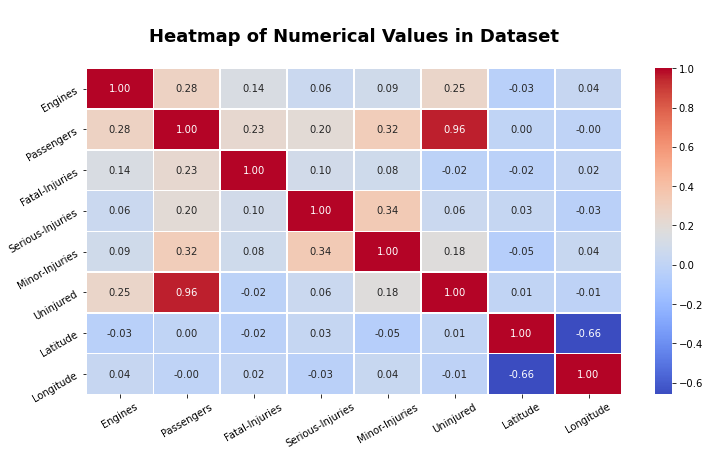

In [550]:
# corr matrix
corr_matrix = df.corr()

# figure size
plt.figure(figsize=(12, 6))  # w, h
# heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Rotation of the axis labels
plt.xticks(rotation=30)
plt.yticks(rotation=30)

# Labels
plt.title('\nHeatmap of Numerical Values in Dataset\n', fontsize=18, fontweight='bold')

# teh Plot
plt.show();

## Visualizations

In [551]:
df.columns

Index(['Date', 'Location', 'Country', 'DamageLevel', 'TypeOfAircraft',
       'Manufacturer', 'Built', 'Engines', 'Passengers', 'Fatal-Injuries',
       'Serious-Injuries', 'Minor-Injuries', 'Uninjured', 'Weather-Condition',
       'Flight.Phase', 'Latitude', 'Longitude'],
      dtype='object')

In [552]:
# Assuming your DataFrame is named df
df['Date'] = pd.to_datetime(df['Date']) 
df['Year'] = df['Date'].dt.year
# confirming
df.columns
# rearranging columns again
columns = ['Date', 'Location', 'Country', 'DamageLevel', 'TypeOfAircraft',       
'Manufacturer', 'Built', 'Engines', 'Passengers', 'Fatal-Injuries',       
'Serious-Injuries', 'Minor-Injuries', 'Uninjured', 'Weather-Condition',       
'Flight.Phase', 'Latitude', 'Longitude', 'Year']
# cementing
df = df[['Year', 'Date', 'Location', 'Country', 'DamageLevel', 'TypeOfAircraft',       
'Manufacturer', 'Built', 'Engines', 'Passengers', 'Fatal-Injuries',       
'Serious-Injuries', 'Minor-Injuries', 'Uninjured', 'Weather-Condition',       
'Flight.Phase', 'Latitude', 'Longitude']]
# check
df.columns

Index(['Year', 'Date', 'Location', 'Country', 'DamageLevel', 'TypeOfAircraft',
       'Manufacturer', 'Built', 'Engines', 'Passengers', 'Fatal-Injuries',
       'Serious-Injuries', 'Minor-Injuries', 'Uninjured', 'Weather-Condition',
       'Flight.Phase', 'Latitude', 'Longitude'],
      dtype='object')

In [553]:
# Weather-Condition
df['Weather-Condition'].value_counts()

# corrections
weather_correction = {'UNK': 'Unknown',
'IMC': 'Bad', 
'VMC': 'Good', 
'Unk': 'Unknown'
}

df['Weather-Condition'] = df['Weather-Condition'].replace(weather_correction)
# cementing changes
df['Weather-Condition'].unique()

array(['Unknown', 'Bad', 'Good'], dtype=object)

# Exporting csv

In [576]:
# exporting csv
filename = 'final-output.csv'

try:
    # Check if file exists and overwrite or create it
    if os.path.exists(filename):
        print(f"File '{filename}' previously existed but overwritten.", end='\n')
    else:
        df.to_csv(filename, index=False)
        print(f"The csv-file '{filename}' was not found, so it has been created.", end='\n')

except PermissionError as e:
    print(f"PermissionError: Unable to write to '{filename}'. Please check file permissions.")
    print(f"Error details: {e}", end='\n')

#   The End!
print('')
print('The End!')

File 'final-output.csv' previously existed but overwritten.

The End!


In [577]:
df.columns

Index(['Year', 'Date', 'Location', 'Country', 'DamageLevel', 'TypeOfAircraft',
       'Manufacturer', 'Built', 'Engines', 'Passengers', 'Fatal-Injuries',
       'Serious-Injuries', 'Minor-Injuries', 'Uninjured', 'Weather-Condition',
       'Flight.Phase', 'Latitude', 'Longitude'],
      dtype='object')

## The Research Questions are:-
### SPECIFIC OBJECTIVES
1. Analyse Aircraft Safety Records – Examine historical accident data to identify aircraft 
models with the lowest accident and fatality rates.

2. Evaluate Risk Factors by Aircraft Type – Assess how factors such as aircraft age, 
manufacturer, engine type, and passenger capacity influence accident frequency and 
severity.

3. Assess the Impact of Weather and Geographic Location – Determine how different 
weather conditions and regions contribute to aircraft accidents and identify aircraft 
best suited for various environments.

4. Compare Commercial vs. Private Aircraft Risks – Investigate whether commercial or 
private aircraft have higher accident rates and identify models that are safer for each 
category.

5. Provide Data-Driven Recommendations for Aircraft Selection – Develop a risk-based 
ranking system to help the company choose the safest and most cost-effective 
aircraft for its new aviation division

### Line Graph Of Accident Vs Year

No handles with labels found to put in legend.


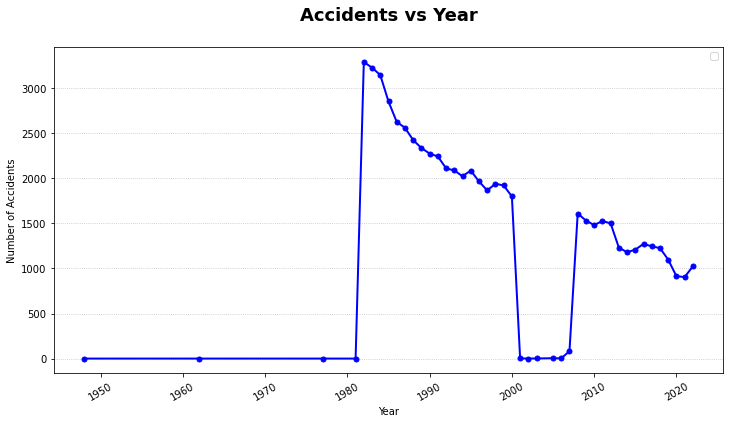

In [578]:
# Step 1: Group by 'Year' and count the accidents per year
accidents_per_year = df.groupby(df['Date'].dt.year).size()

# figure size
plt.figure(figsize=(12, 6))
# Step 2: Plot a line graph
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
# labels
plt.title('Accidents vs Year\n', 
          fontsize = 18, 
          fontweight = 'bold'
          )
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
# Show
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle=':', color='gray', alpha = 0.5)
plt.legend()
plt.show();

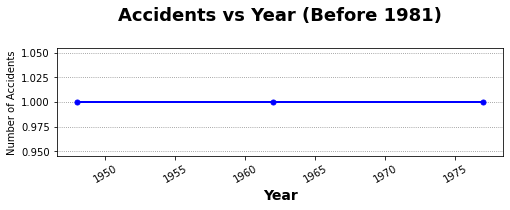

In [579]:
# Step 2: Filter for years before 1981
df_filter = df[df['Date'].dt.year < 1981]

# Step 3: Group by 'Year' and count the accidents per year
accidents_per_year = df_filter.groupby(df_filter['Date'].dt.year).size()

# Step 4: Plot a line graph
plt.figure(figsize=(8, 2))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Accidents vs Year (Before 1981)\n', 
          fontsize = 18, 
          fontweight = 'bold'
          )
plt.xlabel('Year', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents')

# Show only the y-axis grid with dotted lines
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.xticks(rotation=30)
plt.show()


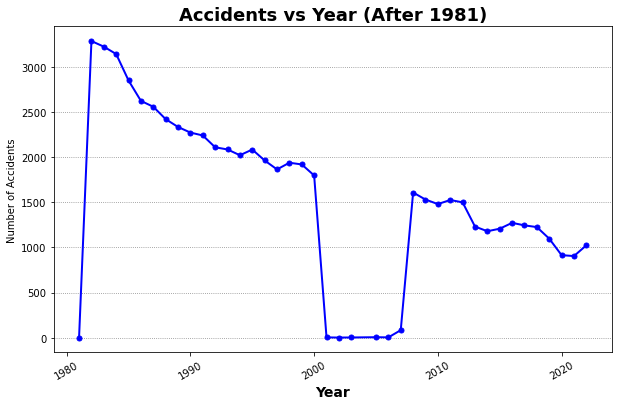

In [580]:
# Step 2: Filter for years before 1981
df_filter = df[df['Date'].dt.year >= 1981]

# Step 3: Group by 'Year' and count the accidents per year
accidents_per_year = df_filter.groupby(df_filter['Date'].dt.year).size()

# Step 4: Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Accidents vs Year (After 1981)', 
          fontsize = 18,
          fontweight = 'bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents')

# Show only the y-axis grid with dotted lines
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.xticks(rotation=30)
plt.show()


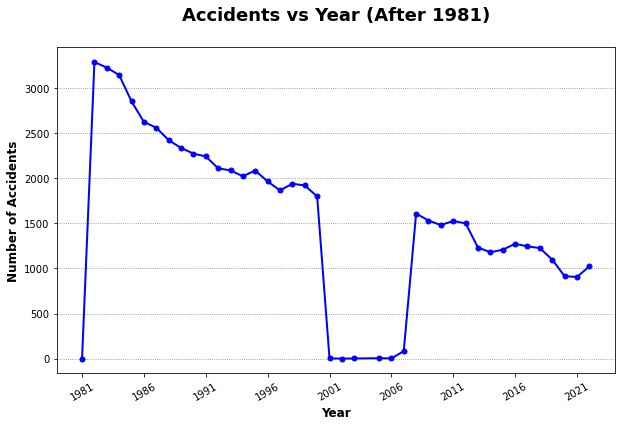

In [581]:
# Step 2: Filter for years before 1981
df_filter = df[df['Date'].dt.year >= 1981]

# Step 3: Group by 'Year' and count the accidents per year
accidents_per_year = df_filter.groupby(df_filter['Date'].dt.year).size()

# Step 4: Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Accidents vs Year (After 1981)\n', 
          fontsize = 18, 
          fontweight = 'bold'
          )
plt.xlabel('Year', 
          fontsize = 12, 
          fontweight = 'bold'
          ) 
plt.ylabel('Number of Accidents', 
          fontsize = 12, 
          fontweight = 'bold'
          )
# Show only the y-axis grid with dotted lines
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
# Set x-ticks every 5 years
plt.xticks(range(min(accidents_per_year.index), max(accidents_per_year.index) + 1, 5))
# rotation
plt.xticks(rotation=30)
plt.show();

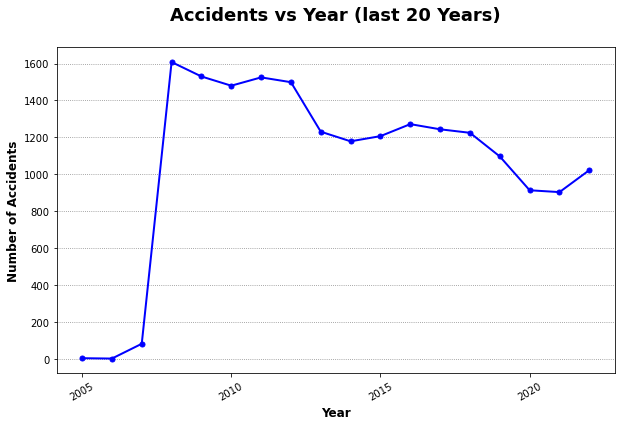

In [582]:
# Step 2: Filter for years before 1981
df_filter = df[df['Date'].dt.year >= 2005]

# Step 3: Group by 'Year' and count the accidents per year
accidents_per_year = df_filter.groupby(df_filter['Date'].dt.year).size()

# Step 4: Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, 
         marker='o', 
         color='b', 
         linestyle='-', 
         linewidth=2, 
         markersize=5
         )
plt.title('Accidents vs Year (last 20 Years)\n', 
          fontsize = 18, 
          fontweight = 'bold'
          )
plt.xlabel('Year', 
          fontsize = 12, 
          fontweight = 'bold'
          ) 
plt.ylabel('Number of Accidents', 
          fontsize = 12, 
          fontweight = 'bold'
          )
# Show only the y-axis grid with dotted lines
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
# Set x-ticks every 5 years
plt.xticks(range(min(accidents_per_year.index), max(accidents_per_year.index) + 1, 5))
# rotation
plt.xticks(rotation=30)
plt.show();

### viz-1: TypeOfAircraft vs count the accidents

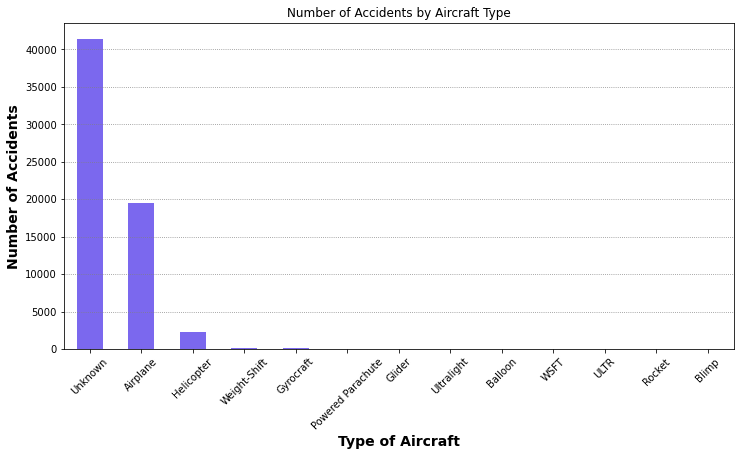

In [583]:
# Step 1: Group by 'TypeOfAircraft' and count the accidents
accidents_per_aircraft_type = df.groupby('TypeOfAircraft').size()

# Step 2: Plot a bar graph
plt.figure(figsize=(12, 6))
accidents_per_aircraft_type.sort_values(ascending=False).plot(kind='bar', color='mediumslateblue')

# labels and title
plt.title('Number of Accidents by Aircraft Type')
plt.xlabel('Type of Aircraft', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show();

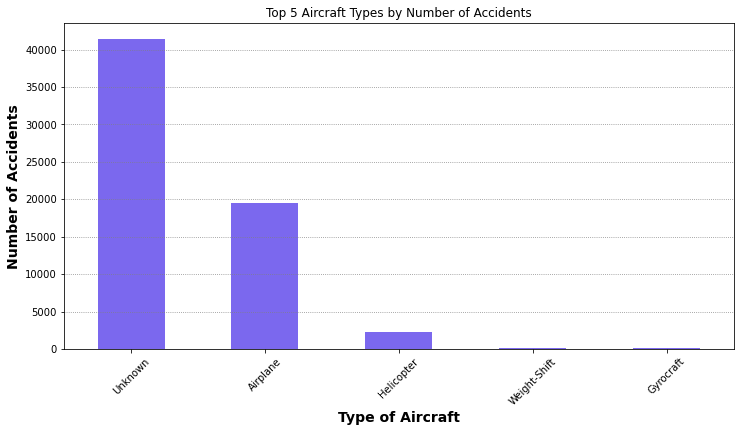

In [584]:
# Step 1: Group by 'TypeOfAircraft' and count the accidents
accidents_per_aircraft_type = df.groupby('TypeOfAircraft').size()

# Step 2: Get the top 10 most frequent aircraft types
top_5_accidents = accidents_per_aircraft_type.sort_values(ascending=False).head(5)

# Step 3: Plot a bar graph
plt.figure(figsize=(12, 6))
# top 10
top_5_accidents.plot(kind='bar', color='mediumslateblue')

# labels and title
plt.title('Top 5 Aircraft Types by Number of Accidents')
plt.xlabel('Type of Aircraft', fontsize=14, fontweight='bold')  
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold') 

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show()


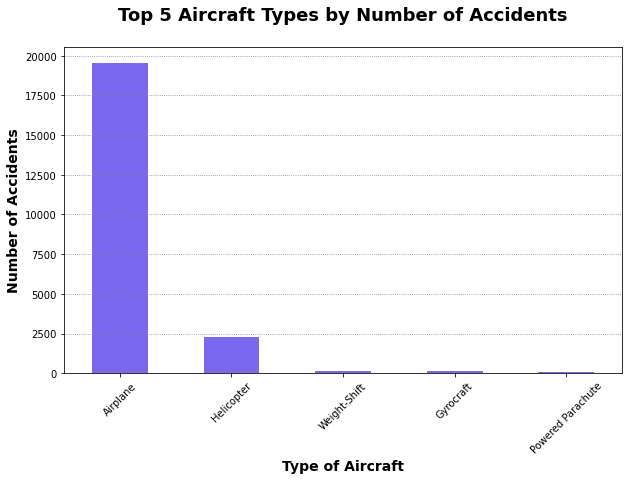

In [585]:
# Step 1: Filter out 'Unknown' values from 'TypeOfAircraft'
df_filtered = df[df['TypeOfAircraft'] != 'Unknown']

# Step 2: Group by 'TypeOfAircraft' and count the accidents
accidents_per_aircraft_type = df_filtered.groupby('TypeOfAircraft').size()

# Step 3: Get the top 5 most frequent aircraft types
top_5_accidents = accidents_per_aircraft_type.sort_values(ascending=False).head(5)

# Step 4: Plot a bar graph
plt.figure(figsize=(10, 6))
top_5_accidents.plot(kind='bar', color='mediumslateblue')

# labels and title
plt.title('Top 5 Aircraft Types by Number of Accidents\n', 
          fontsize=18, 
          fontweight='bold'
          )  
plt.xlabel('Type of Aircraft', fontsize=14, fontweight='bold')  
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold') 

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show();


### viz-2: Manufacturer vs count the accidents

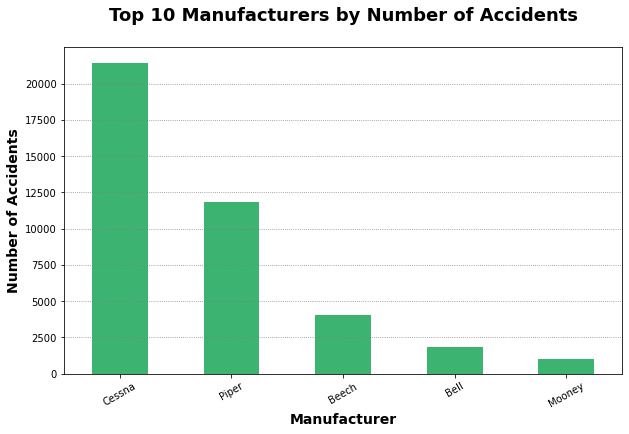

In [586]:
# Step 1: Group by 'Manufacturer' and count the accidents
accidents_per_manufacturer = df.groupby('Manufacturer').size()

# Step 2: Get the top manufacturers based on accident count (optional if needed)
top_manufacturers = accidents_per_manufacturer.sort_values(ascending=False).head(5)  # top 10 for better visualization

# Step 3: Plot a bar graph
plt.figure(figsize=(10, 6))
top_manufacturers.plot(kind='bar', color='mediumseagreen')

# labels and title
plt.title('Top 10 Manufacturers by Number of Accidents\n', 
          fontsize=18, 
          fontweight='bold'
          ) 
plt.xlabel('Manufacturer', fontsize=14, fontweight='bold') 
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show()


## Objective 2: 
### Evaluate Risk Factors by Aircraft Type – Assess how factors such as aircraft age, manufacturer, engine type, and passenger capacity influence accident frequency and severity

<AxesSubplot:xlabel='Engines'>

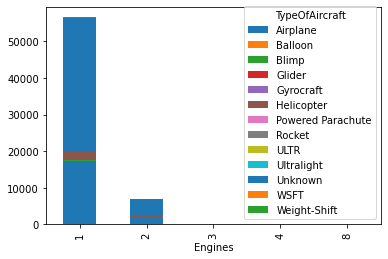

In [587]:
accidents_by_engine = df.groupby(['Engines', 'TypeOfAircraft']).size().unstack()
accidents_by_engine.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Flight.Phase'>

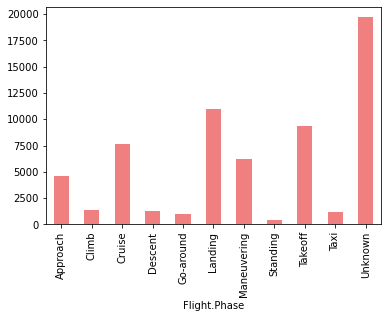

In [588]:
accidents_by_phase = df.groupby('Flight.Phase').size()
accidents_by_phase.plot(kind='bar', color='lightcoral')

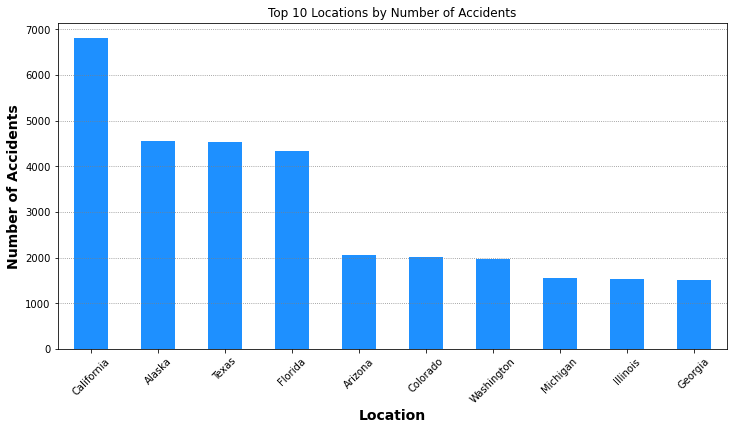

In [589]:
# Location against Count
# # Step 1: Group by 'Location' and count the accidents
accidents_per_location = df.groupby('Location').size()

# Step 2: Get the top 10 locations based on accident count (optional for better visualization)
top_10_locations = accidents_per_location.sort_values(ascending=False).head(10)

# Step 3: Plot a bar graph
plt.figure(figsize=(12, 6))
top_10_locations.plot(kind='bar', color='dodgerblue')

# labels and title
plt.title('Top 10 Locations by Number of Accidents')
plt.xlabel('Location', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show();

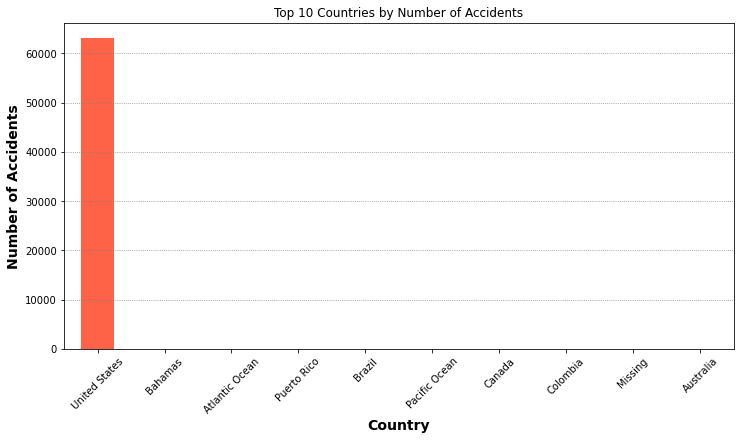

In [ ]:
# country vs count
# Step 1: Group by 'Country' and count the accidents
accidents_per_country = df.groupby('Country').size()

# Step 2: Get the top 10 countries based on accident count (optional for better visualization)
top_10_countries = accidents_per_country.sort_values(ascending=False).head(10)

# Step 3: Plot a bar graph
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='tomato')

# labels and title
plt.title('Top 10 Countries by Number of Accidents')
plt.xlabel('Country', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show()

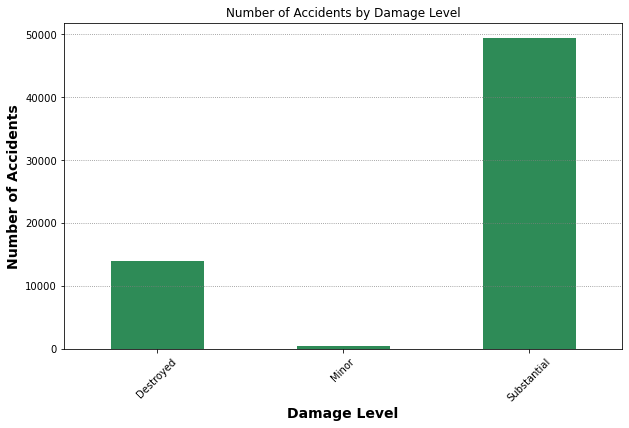

In [591]:
# damage level agansr count
# Step 1: Group by 'DamageLevel' and count the accidents
accidents_per_damage_level = df.groupby('DamageLevel').size()

# Step 2: Plot a bar graph
plt.figure(figsize=(10, 6))
accidents_per_damage_level.plot(kind='bar', color='seagreen')

# labels and title
plt.title('Number of Accidents by Damage Level')
plt.xlabel('Damage Level', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# Rotate x-axis labels to avoid overlap if necessary
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show()


<Figure size 864x432 with 0 Axes>

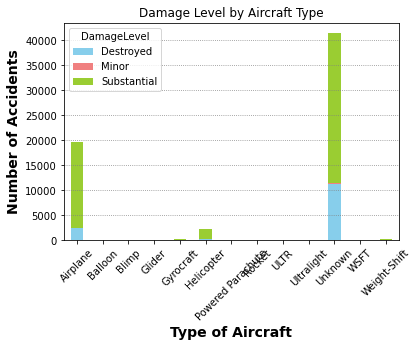

In [592]:
# damagelevel against typeofAircft# Step 1: Group by 'DamageLevel' and 'TypeOfAircraft' and count the accidents
damage_level_by_aircraft = df.groupby(['TypeOfAircraft', 'DamageLevel']).size().unstack()

# Step 2: Plot a stacked bar chart
plt.figure(figsize=(12, 6))
damage_level_by_aircraft.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'yellowgreen', 'lightgrey'])

# labels and title
plt.title('Damage Level by Aircraft Type')
plt.xlabel('Type of Aircraft', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show()


In [593]:
# # Damagelevel against Manufacturer
# ---------------------------
# Takes longs to run
# ---------------------------
# # Step 1: Group by 'DamageLevel' and 'Manufacturer' and count the accidents
# damage_level_by_manufacturer = df.groupby(['Manufacturer', 'DamageLevel']).size().unstack()

# # Step 2: Plot a stacked bar chart
# plt.figure(figsize=(12, 6))
# damage_level_by_manufacturer.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'yellowgreen', 'lightgrey'])

# # labels and title
# plt.title('Damage Level by Manufacturer')
# plt.xlabel('Manufacturer', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
# plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# # Rotate x-axis labels to avoid overlap
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
# plt.show()


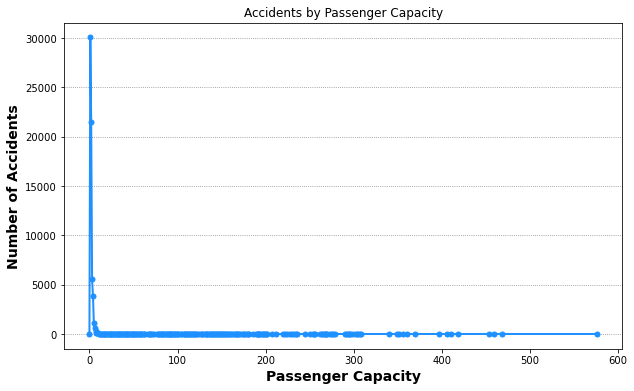

In [596]:
# passenger against number of accidents
# Step 1: Group by 'Passengers' and count the accidents
accidents_by_passenger_capacity = df.groupby('Passengers').size()

# Step 2: Plot a line or scatter plot
plt.figure(figsize=(10, 6))
plt.plot(accidents_by_passenger_capacity.index, accidents_by_passenger_capacity.values, marker='o', color='dodgerblue', linestyle='-', linewidth=2, markersize=5)

# labels and title
plt.title('Accidents by Passenger Capacity')
plt.xlabel('Passenger Capacity', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# Show only the y-axis grid with dotted lines
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show()


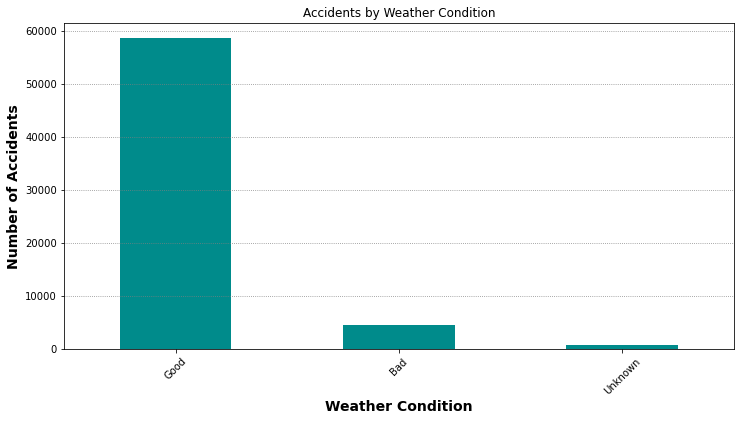

In [595]:
# passenger vs typeofAircarft
# ---------------------------
# Step 1: Group by 'Weather-Condition' and count the accidents
accidents_per_weather_condition = df.groupby('Weather-Condition').size()

# Step 2: Plot a bar chart
plt.figure(figsize=(12, 6))
accidents_per_weather_condition.sort_values(ascending=False).plot(kind='bar', color='darkcyan')

# labels and title
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show()

## Objective 3:
### Assess the Impact of Weather and Geographic Location – Determine how different weather conditions and regions contribute to aircraft accidents and identify aircraft best suited for various environments.

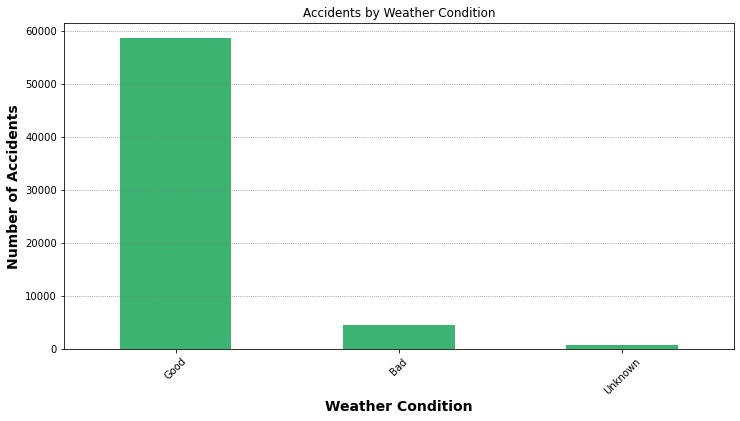

In [597]:
# weather against count of accident
# Step 1: Group by 'Weather-Condition' and count the accidents
accidents_per_weather_condition = df.groupby('Weather-Condition').size()

# Step 2: Plot a bar chart
plt.figure(figsize=(12, 6))
accidents_per_weather_condition.sort_values(ascending=False).plot(kind='bar', color='mediumseagreen')

# labels and title
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', color='gray')  # Dotted grid for y-axis
plt.show()



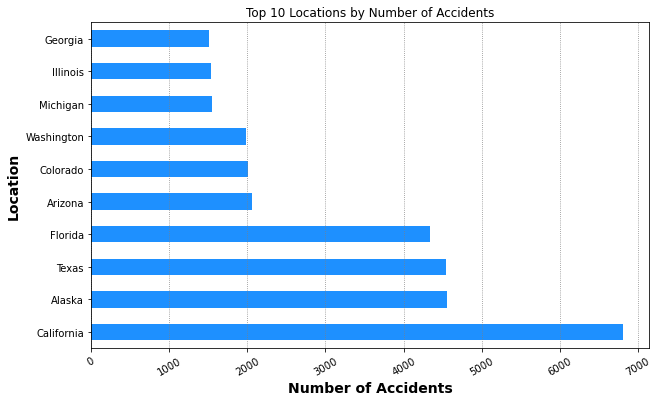

In [601]:
# Location against count of accident
# Step 1: Group by 'Location' and count the accidents
accidents_per_location = df.groupby('Location').size()

# Step 2: Sort and get the top locations (optional to make the plot more readable)
top_locations = accidents_per_location.sort_values(ascending=False).head(10)

# Step 3: Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
top_locations.plot(kind='barh', color='dodgerblue')

# labels and title
plt.title('Top 10 Locations by Number of Accidents')
plt.xlabel('Number of Accidents', fontsize=14, fontweight='bold')  # Make x-axis label bigger and bold
plt.ylabel('Location', fontsize=14, fontweight='bold')  # Make y-axis label bigger and bold

# Grid for better readability
plt.grid(axis='x', linestyle=':', color='gray')  # Dotted grid for x-axis
plt.xticks(rotation=30)
plt.show()


 
## Objective 4:
### Compare Commercial vs. Private Aircraft Risks – Investigate whether commercial or private aircraft have higher accident rates and identify models that are safer for each category.


## Objective 5: 
### Provide Data-Driven Recommendations for Aircraft Selection – Develop a risk-based ranking system to help the company choose the safest and most cost-effective aircraft for its new aviation division